In [0]:
import cv2 as cv
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# **OpenCV basic:**

**1. Read image**

In [0]:
# fig = plt.figure(figsize=(10,8))
# plt.imshow(img)


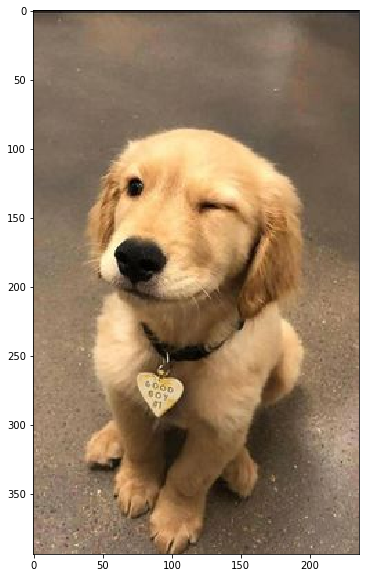

In [0]:
from google.colab.patches import cv2_imshow
img = cv.imread('./dog.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
#Use cv:
# cv2_imshow(img)
#Use matplotlib:
fig=plt.figure(figsize=(8,10))   
plt.imshow(img)



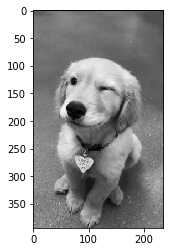

In [0]:
 img_gray = cv2.imread('./dog.jpg', cv2.IMREAD_GRAYSCALE)
 plt.imshow(img_gray, cmap='gray')

In [0]:
img_gray.shape

(394, 236)

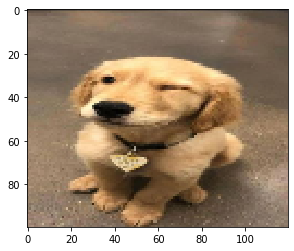

In [0]:
#Resize
new_img = cv2.resize(img,(120,100))
plt.imshow(new_img)

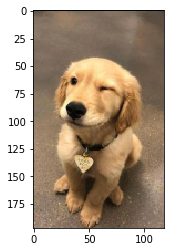

In [0]:
new_img = cv2.resize(img,(0,0),img,0.5,0.5)
plt.imshow(new_img)

**2. Draw and put text on image:**

In [0]:
#create blank image:
blank_img = np.zeros((512,512,3))
#draw a rectangle:
cv.rectangle(blank_img, pt1=(200,200),pt2=(300, 300), color=(0,255,0), thickness=5)
#draw a circle:
cv.circle(blank_img, center=(150,150), radius=50, thickness=-1, color=(0,0,255))
#draw a line:
cv.line(blank_img, pt1=(0,0), pt2=(512,512), thickness=5, color=(100,255,255))
#put a text:
font = cv.FONT_HERSHEY_COMPLEX
cv.putText(blank_img, 'hello world', org=(100, 50), fontFace = font, fontScale=2, color=(100,100,255), thickness=3,
           lineType=cv.LINE_AA);

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


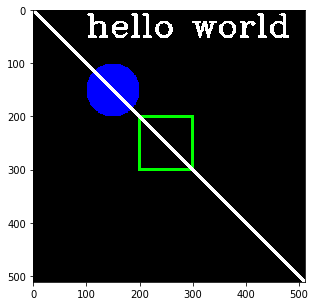

In [0]:
fig=plt.figure(figsize=(5,5))
plt.imshow(blank_img)

**3. Read video from webcam**


In [0]:

# cap=cv.VideoCapture(0)
# while True:
#     ret, frame = cap.read()
#     gray = cv.cvtColor(frame, cv.COLOR_RGB2GRAY)
#     img_gray_blur = cv.GaussianBlur(gray,(3,3), 0 )
#     canny_edges = cv.Canny(img_gray_blur, 20, 50)
#     cv.imshow('frame', canny_edges)
#     if cv.waitKey(1) & 0xFF == 27:
#         break
        
# cv.destroyAllWindows()    

In [0]:
# read video from file:

import time
cap = cv.VideoCapture('path')
if cap.isOpened() == False:
  print('error')
while cap.isOpened():
  ret, frame = cap.read()
  if ret == True:
    time.sleep(1/15)
    cv.imshow('frame', frame)
    if cv.waitKey(1) % 0xFF == 27:
      break
  else:
    break
cap.release()    
cv.destroyAllWindows()

error


# **Template matching:**

In [0]:
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR', 'cv.TM_CCORR_NORMED']
img = cv.imread('/content/drive/My Drive/CV References/img/img.jpg')
part_of_img = cv.imread('/content/drive/My Drive/CV References/img/part_of_img.jpg')
for m in methods:
  img_copy = img.copy()
  img_copy = cv.cvtColor(img_copy, cv.COLOR_BGR2RGB)
  method = eval(m)
# using matchTemplate:
  res= cv.matchTemplate(img_copy, part_of_img, method)
# using eval to return method from list of built-in methods:
  min_val, max_val,  max_loc, min_loc = cv.minMaxLoc(res)
  top_left = min_loc 
  height, width, channels = part_of_img.shape
  bottom_right = (top_left[0]+width, top_left[1]+height)
  cv.rectangle(img_copy, top_left, bottom_right, (255,0,0), 5)
  
  fig = plt.figure(figsize=(10,8))
  plt.subplot(121)
  plt.imshow(res)

  plt.subplot(122)
  plt.imshow(img_copy)
  plt.suptitle(m)

AttributeError: ignored

# **Corner Detection**

In [0]:
img_copy1 = img.copy()
gray = cv.cvtColor(img_copy1, cv.COLOR_RGB2GRAY)
gray = np.float32(gray)
dst = cv.cornerHarris(gray, blockSize=2, ksize=3, k=0.04)
dst = cv.dilate(dst,None)
img_copy1[dst>0.01*dst.max()] = [255,0,0]


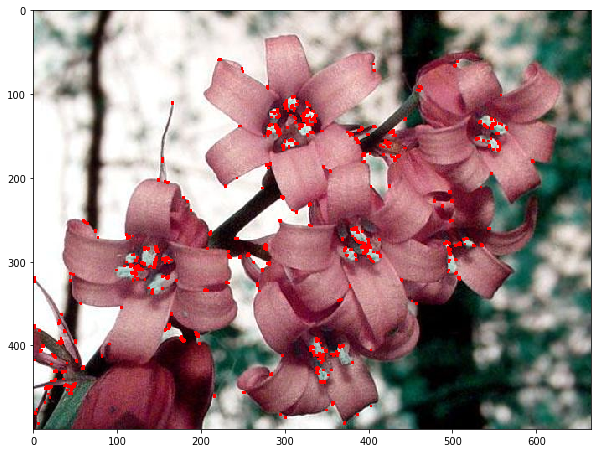

In [0]:
fig = plt.figure(figsize=(10,8))
plt.imshow(img_copy1, cmap='gray')

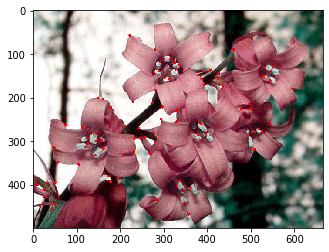

In [0]:
corners = cv.goodFeaturesToTrack(gray,100, 0.01, 10)
corners = np.int0(corners)
img_copy2 = img.copy()
for i in corners:
  x,y = i.ravel()
  cv.circle(img_copy2,(x,y),3,(255,0,0),-1)
plt.imshow(img_copy2)  

# **Edge Detection:**

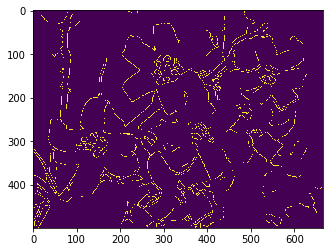

In [0]:
#Blur the img first:
img_copy3 = img.copy()
blurred_img = cv.blur(img_copy3, (5,5))
plt.imshow(blurred_img);

#formula to set the threshold:
med_val = np.median(blurred_img)
lower =int(max(0,0.7*med_val))
upper = int(min(255, 1.3*med_val))

#Detect edges:
edges = cv.Canny(blurred_img, threshold1=lower, threshold2=upper)
plt.imshow(edges)


# **Feature matching:**

In [0]:
#display image function:
def display(img, cmap='gray'):
  fig = plt.figure(figsize=(10,8))
  ax=fig.add_subplot(111)
  ax.imshow(img, cmap='gray')  
def cvt(img):
  cv.cvtColor(img, cv.COLOR_BGR2RGB)

**Brute-Force Matching with ORB Descriptors**

In [0]:
# We are using ORB descriptors to match features. 
# So let's start with loading images, finding descriptors etc.
cvt(tag)
cvt(full)
tag = cv.imread('/content/drive/My Drive/CV References/img/tag.jpg')
full = cv.imread('/content/drive/My Drive/CV References/img/full.jpg')

# display(tag)
# display(full)

In [0]:
def feature_matching_orb(img1, img2):
  # Initiate ORB detector
  orb = cv.ORB_create()
  # find the keypoints and descriptors with ORB
  kp1, des1 = orb.detectAndCompute(img1,None)
  kp2, des2 = orb.detectAndCompute(img2,None)
  # create a BFMatcher object with distance measurement cv.NORM_HAMMING 
  #crossCheck is switched on for better results.
  bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)
  #use Matcher.match() method to get the best matches in two images.
  matches = bf.match(des1,des2)
  #sort  in ascending order of their distances so that best matches 
  #(with low distance) come to front
  matches = sorted(matches, key = lambda x:x.distance)
  # draw only first 10 matches (for the sake of visibility)
  img3 = cv.drawMatches(img1,kp1,img2,kp2,matches[:10],None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
  fig=plt.figure(figsize=(10,8))
  plt.imshow(img3),plt.show()


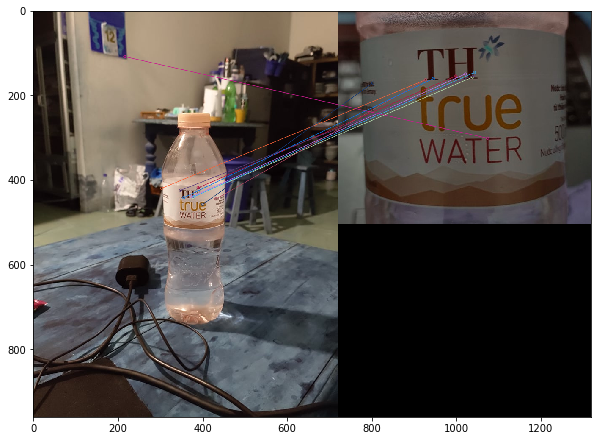

In [0]:
feature_matching_orb(full,tag)


**Brute-Force Matching with SIFT Descriptors and Ratio Test**

In [0]:
def feature_matching_bf(img1, img2):
  # Initiate SIFT detector
  sift = cv.xfeatures2d.SIFT_create()
  # find the keypoints and descriptors with SIFT
  kp1, des1 = sift.detectAndCompute(img1,None)
  kp2, des2 = sift.detectAndCompute(img2,None)
  # BFMatcher with default params
  bf = cv.BFMatcher()
  matches = bf.knnMatch(des1,des2,k=2)
  # Apply ratio test
  good = []
  for m,n in matches:
    if m.distance < 0.75*n.distance:
      good.append([m])
# cv.drawMatchesKnn expects list of lists as matches.
  img3 = cv.drawMatchesKnn(img1,kp1,img2,kp2,good,None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
  fig=plt.figure(figsize(10,8))
  plt.imshow(img3),plt.show()

In [0]:
# feature_matching_bf(full, tag);
# error because xfeatures2d is patented, not provided in google colab

**FLANN based Matcher**
 
It works faster than BFMatcher for large datasets


In [0]:
def feature_matching_flan(img1, img2):
  #we need to pass two dictionaries which specifies the algorithm to be used, 
  #its related parameters etc. 
  FLANN_INDEX_KDTREE = 1
  index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
  
  # Initiate SIFT detector
  sift = cv.xfeatures2d.SIFT_create()
  # find the keypoints and descriptors with SIFT
  kp1, des1 = sift.detectAndCompute(img1,None)
  kp2, des2 = sift.detectAndCompute(img2,None)
  # FLANN parameters
  FLANN_INDEX_KDTREE = 1
  index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
  search_params = dict(checks=50)   # or pass empty dictionary
  flann = cv.FlannBasedMatcher(index_params,search_params)
  matches = flann.knnMatch(des1,des2,k=2)
  # Need to draw only good matches, so create a mask
  matchesMask = [[0,0] for i in range(len(matches))]
  # ratio test as per Lowe's paper
  for i,(m,n) in enumerate(matches):
    if m.distance < 0.7*n.distance:
      matchesMask[i]=[1,0]
  draw_params = dict(matchColor = (0,255,0),
                   singlePointColor = (255,0,0),
                   matchesMask = matchesMask,
                   flags = cv.DrawMatchesFlags_DEFAULT)
  img3 = cv.drawMatchesKnn(img1,kp1,img2,kp2,matches,None,**draw_params)
  fig=plt.figure(figsize(10,8))
  plt.imshow(img3,),plt.show()

In [0]:
# feature_matching_flan(full, tag)

#PATENTED

# **Image Segmentation**


In [0]:
# https://docs.opencv.org/master/d3/db4/tutorial_py_watershed.html


In [0]:
def watershed(img):
  gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
  ret, thresh = cv.threshold(gray,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
  # noise removal
  kernel = np.ones((3,3),np.uint8)
  opening = cv.morphologyEx(thresh,cv.MORPH_OPEN,kernel, iterations = 2)
  # sure background area
  sure_bg = cv.dilate(opening,kernel,iterations=3)
  # Finding sure foreground area
  dist_transform = cv.distanceTransform(opening,cv.DIST_L2,5)
  ret, sure_fg = cv.threshold(dist_transform,0.7*dist_transform.max(),255,0)
  # Finding unknown region
  sure_fg = np.uint8(sure_fg)
  unknown = cv.subtract(sure_bg,sure_fg)
  # Marker labelling
  ret, markers = cv.connectedComponents(sure_fg)
  # Add one to all labels so that sure background is not 0, but 1
  markers = markers+1
  # Now, mark the region of unknown with zero
  markers[unknown==255] = 0
  markers = cv.watershed(img,markers)
  img[markers == -1] = [255,0,0]
  plt.imshow(markers)


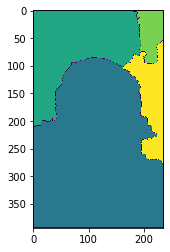

In [0]:
coin=cv.imread('./dog.jpg')
watershed(coin)


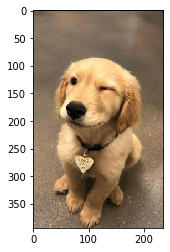

In [0]:
img = cv.imread('./dog.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)